In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic['Age'].isnull().sum()/len(titanic)

0.19865319865319866

In [6]:
titanic['Cabin'].isnull().sum()/len(titanic)

0.7710437710437711

In [7]:
titanic.drop('Cabin',axis=1,inplace=True)

[]

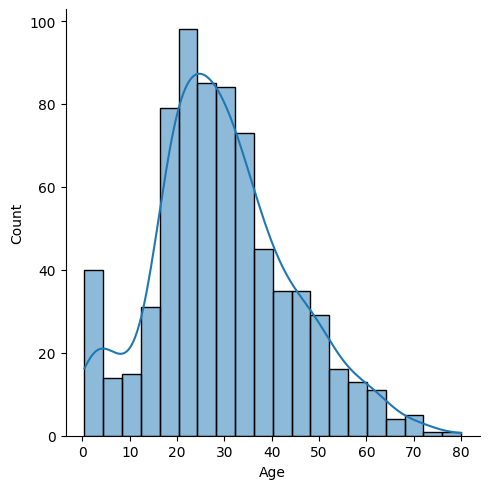

In [8]:
sns.displot(titanic['Age'],kde = True)
plt.plot()

In [9]:
titanic['Age'].fillna(titanic['Age'].median(),inplace =True)

In [10]:
titanic['Age'].isnull().sum()

0

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
titanic.duplicated().sum()

0

[]

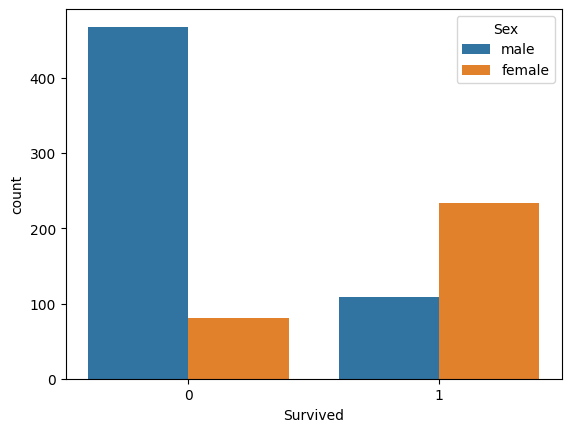

In [13]:
sns.countplot(data= titanic,x= 'Survived', hue = 'Sex')
plt.plot()

In [14]:
pd.pivot_table(data = titanic, index = 'Survived', columns = 'Sex', values = 'PassengerId',aggfunc = 'count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
titanic['Sex'].nunique()

2

In [17]:
Sex = pd.get_dummies(titanic['Sex'], drop_first=True)

In [18]:
titanic['Sex'] = Sex

In [19]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
410,411,0,3,"Sdycoff, Mr. Todor",1,28.0,0,0,349222,7.8958,S
267,268,1,3,"Persson, Mr. Ernst Ulrik",1,25.0,1,0,347083,7.7750,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",0,24.0,0,0,248733,13.0000,S
655,656,0,2,"Hickman, Mr. Leonard Mark",1,24.0,2,0,S.O.C. 14879,73.5000,S
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",0,40.0,0,0,C.A. 33595,15.7500,S


In [20]:
titanic['Ticket'].nunique()

681

In [21]:
titanic['Embarked'].nunique()

3

In [22]:
titanic.dropna(inplace=True)

In [23]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
Embarked = pd.get_dummies(titanic['Embarked'])

In [25]:
Embarked.sample(5)

,C,Q,S
436,0,0,1
260,0,1,0
591,1,0,0
525,0,1,0
490,0,0,1


In [26]:
titanic = pd.concat((titanic,Embarked),axis = 1)

In [27]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
522,523,0,3,"Lahoud, Mr. Sarkis",1,28.0,0,0,2624,7.2250,C,1,0,0
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",0,28.0,0,0,330909,7.6292,Q,0,1,0
56,57,1,2,"Rugg, Miss. Emily",0,21.0,0,0,C.A. 31026,10.5000,S,0,0,1
732,733,0,2,"Knight, Mr. Robert J",1,28.0,0,0,239855,0.0000,S,0,0,1
141,142,1,3,"Nysten, Miss. Anna Sofia",0,22.0,0,0,347081,7.7500,S,0,0,1


In [28]:
titanic.drop('Embarked', axis= 1, inplace =True)

In [29]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
357,358,0,2,"Funk, Miss. Annie Clemmer",0,38.0,0,0,237671,13.0000,0,0,1
401,402,0,3,"Adams, Mr. John",1,26.0,0,0,341826,8.0500,0,0,1
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",1,19.0,0,0,348124,7.6500,0,0,1
524,525,0,3,"Kassem, Mr. Fared",1,28.0,0,0,2700,7.2292,1,0,0
73,74,0,3,"Chronopoulos, Mr. Apostolos",1,26.0,1,0,2680,14.4542,1,0,0


In [30]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'C', 'Q', 'S'],
      dtype='object')

In [31]:
titanic.drop(['PassengerId','Name','Ticket'],axis= 1,inplace = True)

In [32]:
titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
542,0,3,0,11.0,4,2,31.2750,0,0,1
572,1,1,1,36.0,0,0,26.3875,0,0,1
407,1,2,1,3.0,1,1,18.7500,0,0,1
45,0,3,1,28.0,0,0,8.0500,0,0,1
319,1,1,0,40.0,1,1,134.5000,1,0,0


In [33]:
X = titanic.drop('Survived',axis =1)
y = titanic['Survived']

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    int64  
 1   Sex     889 non-null    uint8  
 2   Age     889 non-null    float64
 3   SibSp   889 non-null    int64  
 4   Parch   889 non-null    int64  
 5   Fare    889 non-null    float64
 6   C       889 non-null    uint8  
 7   Q       889 non-null    uint8  
 8   S       889 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 45.1 KB


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state= 777)

In [36]:
lg.fit(X_train,y_train)

LogisticRegression()

In [37]:
predicted = lg.predict(X_test)

In [38]:
confusion_matrix(y_test,predicted)

array([[114,  14],
       [ 39,  56]], dtype=int64)

In [39]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       128
           1       0.80      0.59      0.68        95

    accuracy                           0.76       223
   macro avg       0.77      0.74      0.75       223
weighted avg       0.77      0.76      0.75       223



In [40]:
titanic1 = pd.read_csv('test.csv')

In [41]:
titanic1.drop('Cabin',axis=1,inplace=True)

In [44]:
titanic1['Age'].fillna(titanic1['Age'].median(),inplace =True)

In [43]:
Sex = pd.get_dummies(titanic1['Sex'], drop_first=True)

In [45]:
titanic1['Sex'] = Sex

In [46]:
Embarked = pd.get_dummies(titanic1['Embarked'])

In [47]:
titanic1 = pd.concat((titanic1,Embarked),axis = 1)

In [48]:
titanic1.drop('Embarked', axis= 1, inplace =True)

In [49]:
titanic1.drop(['PassengerId','Name','Ticket'],axis= 1,inplace = True)

In [50]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    uint8  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
 6   C       418 non-null    uint8  
 7   Q       418 non-null    uint8  
 8   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 18.1 KB


In [53]:
titanic1['Fare'].fillna(titanic1['Fare'].median(),inplace =True)

In [54]:
titanic1.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
C         0
Q         0
S         0
dtype: int64

In [55]:
predicted1 = lg.predict(titanic1)

In [56]:
titanic2 = pd.read_csv('test.csv')

In [57]:
t1 = titanic2['PassengerId']

In [61]:
p1 = pd.DataFrame(predicted1, index = t1)

In [62]:
p1.columns = ['Survived']

In [63]:
p1

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [64]:
p1.to_csv('titanic.csv')